# Car Make and Model Recognizer
I shall explore here my tries to reach a good optimizer

## Importing Libraries

In [1]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Flatten, Dense, BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from glob import glob

Using TensorFlow backend.


## Pre-Processing

### Data Augmentation

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.25,
                                   rotation_range = 90,
                                   horizontal_flip=True,
                                  validation_split = 0.3)
#test_datagen = ImageDataGenerator(rescale=1./255,
 #                                horizontal_flip = True)

train_data = train_datagen.flow_from_directory('My_Cars/train',
                                              target_size=(256,256),
                                              batch_size=32,
                                              class_mode='categorical',
                                              subset='training')
test_data = train_datagen.flow_from_directory('My_Cars/train',
                                              target_size=(256,256),
                                              batch_size=32,
                                              class_mode='categorical',
                                            subset='validation',
                                            shuffle=True)

Found 5796 images belonging to 196 classes.
Found 2348 images belonging to 196 classes.


## Model

In [3]:
model = Sequential()

#First Layer
model.add(Conv2D(filters=32, kernel_size=6,padding='same', input_shape=(256, 256, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides = 4))
model.add(BatchNormalization())
model.add(Dropout(0.25))
#Second Layer
model.add(Conv2D(filters=64, kernel_size=6, activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides = 4))
model.add(BatchNormalization())
model.add(Dropout(0.25))
#Third Layer
model.add(Conv2D(filters=128, kernel_size=6, activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides = 4))
model.add(Dropout(0.25))
model.add(BatchNormalization())
#Fourth Layer
model.add(Conv2D(filters=128, kernel_size=6,padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides = 4))
model.add(Dropout(0.25))


#Last Layer
#model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(GlobalAveragePooling2D())
model.add(Dense(196, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 32)      3488      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 59, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 15, 15, 64)        256       
__________

### Train

In [5]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 50

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='Saved_Models/weights.best.from_scratch23.hdf5', 
                               verbose=1, save_best_only=True)

Saving = model.fit_generator(train_data,
          steps_per_epoch=200,  
          epochs=epochs,
          verbose=1, 
          validation_data=test_data,
          validation_steps=100,
          callbacks=[checkpointer])
# model.fit(train_data, test_data,
#                   callbacks = [checkpointer],
#                   validation_split = 0.33,
#                   epochs=epochs,
#           batch_size = 20,
#           verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
200/200 [==============================] - 205s 1s/step - loss: 5.6566 - acc: 0.0105 - val_loss: 8.6812 - val_acc: 0.0035

Epoch 00001: val_loss improved from inf to 8.68124, saving model to Saved_Models/weights.best.from_scratch23.hdf5
Epoch 2/50
200/200 [==============================] - 190s 949ms/step - loss: 5.3861 - acc: 0.0131 - val_loss: 6.4295 - val_acc: 0.0110

Epoch 00002: val_loss improved from 8.68124 to 6.42946, saving model to Saved_Models/weights.best.from_scratch23.hdf5
Epoch 3/50
200/200 [==============================] - 190s 950ms/step - loss: 5.2791 - acc: 0.0183 - val_loss: 5.4100 - val_acc: 0.0123

Epoch 00003: val_loss improved from 6.42946 to 5.40995, saving model to Saved_Models/weights.best.from_scratch23.hdf5
Epoch 4/50
200/200 [==============================] - 188s 940ms/step - loss: 5.2079 - acc: 0.0202 - val_loss: 5.4186 - val_acc: 0.0182

Epoch 00004: val_loss did not improve from 5.40995
Epoch 

200/200 [==============================] - 199s 996ms/step - loss: 3.9121 - acc: 0.1398 - val_loss: 5.2119 - val_acc: 0.0380

Epoch 00040: val_loss did not improve from 5.01388
Epoch 41/50
200/200 [==============================] - 199s 994ms/step - loss: 3.8923 - acc: 0.1394 - val_loss: 5.1358 - val_acc: 0.0506

Epoch 00041: val_loss did not improve from 5.01388
Epoch 42/50
200/200 [==============================] - 194s 969ms/step - loss: 3.8691 - acc: 0.1455 - val_loss: 5.3244 - val_acc: 0.0371

Epoch 00042: val_loss did not improve from 5.01388
Epoch 43/50
200/200 [==============================] - 201s 1s/step - loss: 3.8435 - acc: 0.1481 - val_loss: 5.1693 - val_acc: 0.0513

Epoch 00043: val_loss did not improve from 5.01388
Epoch 44/50
200/200 [==============================] - 202s 1s/step - loss: 3.8245 - acc: 0.1570 - val_loss: 5.3678 - val_acc: 0.0340

Epoch 00044: val_loss did not improve from 5.01388
Epoch 45/50
200/200 [==============================] - 191s 956ms/step - 

In [6]:

vals = pd.DataFrame.from_dict(Saving.history)
vals = pd.concat([pd.Series(range(0,100),name='epochs'),vals],axis=1)
vals.head(n=31)

,epochs,val_loss,val_acc,loss,acc
0,0,8.681242,0.003459,5.656413,0.010515
1,1,6.429461,0.011006,5.380307,0.013183
2,2,5.409953,0.012342,5.279377,0.018362
3,3,5.418573,0.018239,5.208231,0.020245
4,4,5.370258,0.015723,5.139152,0.019146
5,5,5.321988,0.023734,5.086714,0.026993
6,6,5.217229,0.024214,5.037932,0.028092
7,7,5.217272,0.020126,4.985007,0.036095
8,8,5.364325,0.024367,4.965361,0.033584
9,9,5.225970,0.024843,4.909929,0.039077


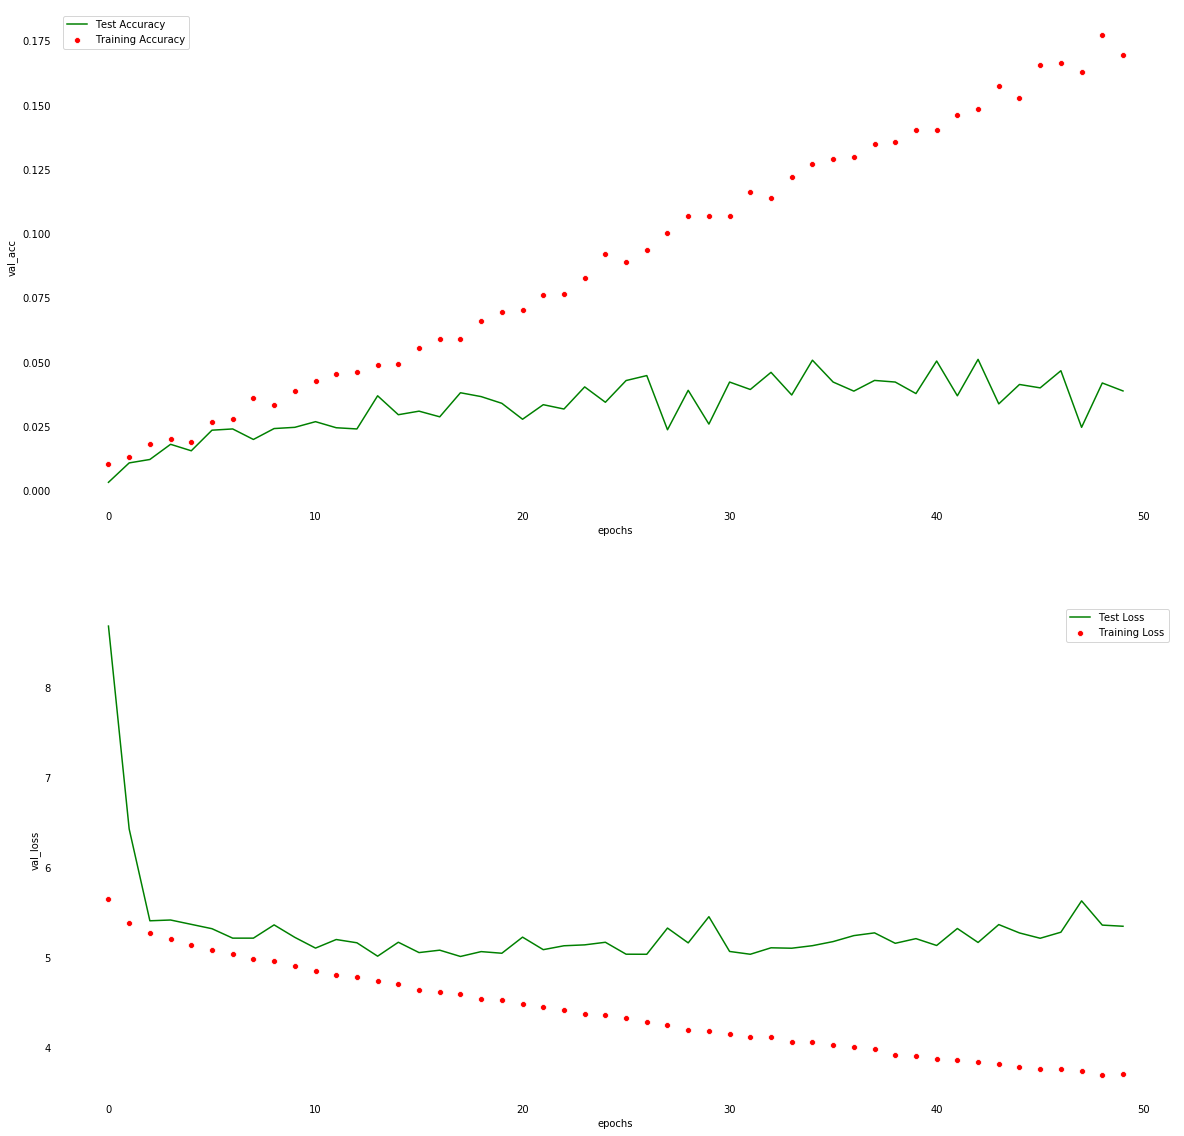

In [7]:
import seaborn as sns
sns.set_style({'xtick.bottom':False,
               'ytick.left':False,
               'axes.spines.bottom': False,
               'axes.spines.left': False,
               'axes.spines.right': False,
               'axes.spines.top': False})

ig,(ax,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(20,20))
sns.scatterplot(x='epochs',y='acc',data=vals,ax=ax,color='r')
sns.lineplot(x='epochs',y='val_acc',data=vals,ax=ax,color='g')
sns.scatterplot(x='epochs',y='loss',data=vals,ax=ax1,color='r')
sns.lineplot(x='epochs',y='val_loss',data=vals,ax=ax1,color='g')
ax.legend(labels=['Test Accuracy','Training Accuracy'])
ax1.legend(labels=['Test Loss','Training Loss'])

In [ ]:
# for i in range(n_iterations):
#         print('\r{}/{}'. format(i, n_iterations))
#         #initilaize random hyperparameters
#         random_parameters = {K: random.sample(V, 1)[0] for K, V in parameters_grid.items()}
#         #create model with random hyperparameters
#         model = create_model(random_parameters)
#         opt = create_RMSprop_optimizer(random_parameters)
#         #compile model
#         model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])
#         #train model
#         epochs = 40
#         checkpointer = ModelCheckpoint(filepath='saved_models/model_weights.hdf5', verbose=1, save_best_only=True)
#         early_stopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 8)
#         history = model.fit(X_train, Y_train,
#                   callbacks = [checkpointer, early_stopping],
#                   validation_split = 0.33,
#                   epochs=epochs, batch_size = 20, verbose=1)
#         #compare current min validation loss with global min validation loss
#         current_min_val_loss = np.min(history.history['val_loss'])
#         if(current_min_val_loss < global_min_val_loss):
#             global_min_val_loss = current_min_val_loss
#             #save the best model so far
#             model.load_weights('saved_models/model_weights.hdf5')
#             model.save('saved_models/best_model.h5')
#             print('saving new best model, val_loss = {}'.format(current_min_val_loss))
#             #save best hyperparameters
#             best_hyperparameters = random_parameters